# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откроем файл с данными и изучите общую информацию. 

**1.1 Импортируем необходимые библиотеки, прочитаем данные из csv-файла в датафрейм и сохраним в переменную data.**

In [60]:
# импортируем необходимые библиотеки

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [61]:
# применим параметр sep, т.к. данные склеились в одну строку

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

# сохраним данные без обработки

old_data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [64]:
data.to_csv('dataset.csv', index=False)

**1.2 Выведем основную информацию о датафрейме и проверим количество явных дубликатов**

In [3]:
data.info()

print('Количество явных дубликатов =', data.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**1.3 Выведем первые 20 строчек датафрейма на экран.**

In [4]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


**1.4 Посмотрим информацию о таблице методом describe().**

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**1.5 Построим общую гистограмму для всех числовых столбцов таблицы.**

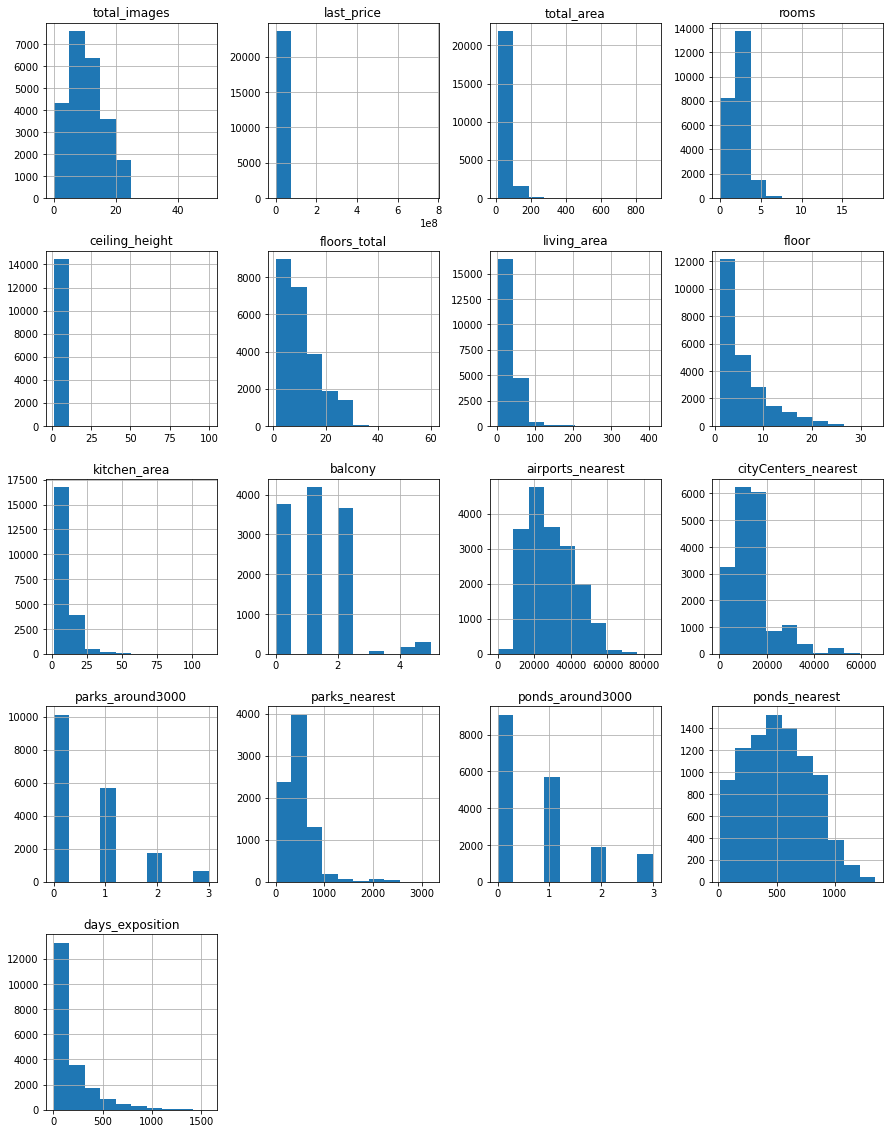

In [6]:
data.hist(figsize=(15,20));

**Вывод:**
- всего в таблице 22 столбца и 23699 записи
- больше половины столбцов имеют пропущенные значения
- некоторые столбцы имеют некорректный тип данных (например, тип данных в 'first_day_exposition' - должен быть datetime, а в 'is_apartment' - bool)
- явные дубликаты не выявлены
- написание названия столбца 'cityCenters_nearest' - дурной тон
- есть аномальные значения, например, высота потолков, где минимум - 1 метр, а максимум - 100 метров или общая площадь, где минимум 12 кв.м., а максимум - 900 кв.м.


### Предобработка данных

In [7]:
# переименуем столбцы в соответствии со стилем snake_case

data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'}, inplace=True)

**2.1 Найдем и изучим пропущенные значения в столбцах.**

In [8]:
# Определим в каких столбцах есть пропуски.
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [9]:
# Заполним пропущенные значения в столбце 'balcony'

data['balcony'] = data['balcony'].fillna(0)
print('Количество пропусков в столбце "balcony" =', data['balcony'].isna().sum())


Количество пропусков в столбце "balcony" = 0


- В столбце 'balcony': продавец не указал число балконов, т.к., скорее всего, в его квартире их нет. Такие пропуски заменим на 0.

In [10]:
# Заполним пропущенные значения в столбце 'is_apatment'

data['is_apartment'] = data['is_apartment'].fillna(False)
print('Количество пропусков в столбце "is_apartment" =', data['is_apartment'].isna().sum())


Количество пропусков в столбце "is_apartment" = 0


- В столбце 'is_apartment': пропущенные значения скорее всего не являются апартаментами. Такие пропуски заменим на False.


In [11]:
# Удалим пропущенные значения в столбце 'floors_total' методом dropna

data.dropna(subset=['floors_total'], inplace=True)
print('Количество пропусков в столбце "floors_total" =', data['floors_total'].isna().sum())

Количество пропусков в столбце "floors_total" = 0


- В столбце 'floors_total': пропущенных значений всего 86, поэтому удалим их.


In [12]:
# Заполним пропущенные значения в столбце 'ceiling_hight' медианным значением

median = data.groupby('floors_total')['ceiling_height'].transform('median')
data['ceiling_height'] = data['ceiling_height'].fillna(median)
print('Количество пропусков в столбце "ceiling_height" =', data['ceiling_height'].isna().sum())


# Остался один пропуск, по 32 этажу, заполним его значением по 31 и 33 этажу = 2.70

data['ceiling_height'] = data['ceiling_height'].fillna(2.70)
print('Количество пропусков в столбце "ceiling_height" =', data['ceiling_height'].isna().sum())


Количество пропусков в столбце "ceiling_height" = 1
Количество пропусков в столбце "ceiling_height" = 0



- Для пропусков столбца 'ceiling_height' рассчитаем медианное значение, т.к. есть строительные стандарты, которые определяют высоту потолков.


In [13]:
# Удалим пропущенные значения в столбце 'locality_name' методом dropna

data.dropna(subset=['locality_name'], inplace=True)
print('Количество пропусков в столбце "locality_name" =', data['locality_name'].isna().sum())


Количество пропусков в столбце "locality_name" = 0


- В столбце 'locality_name': пропущенных значений всего 48, поэтому удалим их.


In [15]:
# посмотрим в каких столбцах остались пропуски
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

Пропущенные значения в оставшихся столбцах не повлияют на анализ, поэтому оставим их как есть.

**2.2 Рассмотрим и преобразуем тип данных в столбцах.**

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21700 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

In [17]:
# преобразуем тип данных

for col in ['last_price', 'balcony', 'floors_total']:
    data[col] = data[col].astype('int')
data.info()

# преобразуем тип данных в 'is_apartment'

data['is_apartment'] = data['is_apartment'].astype('bool')

# преобразуем тип данных в 'first_day_exposition'

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%d')



<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  int64  
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  int64  
 7   living_area           21700 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               23565 non-null  int64  
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

- столбец 'is_apatment' из-за пропусков был типа 'object', чтобы работать со столбцом преобразуем его в булев тип
- столбец 'first_day_exposition' - отбросим время, т.к. оно заполнено не было и преобразуем в datetime
- остальные столбцы преобразуем в целочисленный тип, т.к. с целыми числами арифметика выполняется быстрее и потребляет меньше памяти


**2.3 Изучим уникальные значения в столбце 'locality_name'.**

In [18]:
# посмотрим уникальные значения

data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [19]:
# заменим все "ё" на "е"

data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

# заменим "поселок городского типа" на "поселок"

data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'поселок')

# заменим "городской поселок" на "поселок"

data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок')



**2.4 Найдем и устраним редкие и выбивающиеся значения.**

In [20]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,21700.000000,23565.000000,21343.000000,23565.000000,18041.000000,18064.000000,18065.000000,8030.000000,18065.000000,9036.000000,20394.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.735739,10.675875,34.454822,5.878124,10.560994,0.593677,28797.082701,14192.656056,0.611569,490.580448,0.769499,518.289509,180.741395
std,5.681156,1.091093e+07,35.657060,1.078591,0.996999,6.594823,22.045359,4.871485,5.900630,0.960660,12632.499735,8613.348153,0.802088,341.572956,0.938669,278.009558,219.732782
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.550000,5.000000,18.600000,2.000000,7.000000,0.000000,18565.000000,9238.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26757.000000,13096.500000,0.000000,455.000000,1.000000,503.000000,95.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.750000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16285.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


225
9


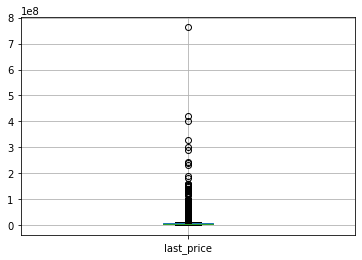

In [21]:
# чтобы изучить особенность поближе, построим коробчатую диаграмму

data.boxplot(column=['last_price'])

# посмотрим количество квартир стоимостью менее 1 000 000 

print(data.query('last_price < 1e+06')['last_price'].count())

# посмотрим количество квартир стоимостью более 200 000 000

print(data.query('last_price > 2e+08')['last_price'].count())



- Количество квартир, стоимостью менее 1млн. = 224шт. Не похоже на выброс.
- Количество квартир, стоимостью более 200 млн. = 9шт., удалим.

In [22]:
# удалим выбросы в столбце 'last_price'

data.loc[data['last_price'] > 2e+08, 'last_price'] = np.nan 
print(data.query('last_price > 2e+08')['last_price'].count())


0


194
90
0
135
59
0


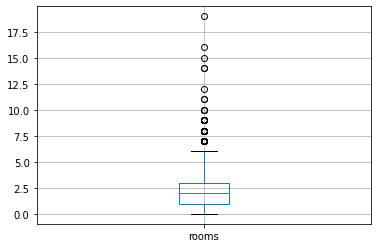

In [23]:
# чтобы изучить особенность поближе, построим коробчатую диаграмму

data.boxplot(column=['rooms'])

# посмотрим количество квартир с квартирами без комнат 

print(data.query('rooms == 0')['rooms'].count())

# посмотрим количество квартир с количеством комнат более 6

print(data.query('rooms > 6')['rooms'].count())

#проверим квартиры без комнат - возможно это аппартаменты, свободная планировка или студии

print(data.query('rooms == 0 and is_apartment')['rooms'].count())
print(data.query('rooms == 0 and studio')['rooms'].count())
print(data.query('rooms == 0 and open_plan')['rooms'].count())

# удалим выбросы в столбце 'rooms'

data.loc[data['rooms'] > 6, 'rooms'] = np.nan 
print(data.query('rooms > 6')['rooms'].count())



- всего квартир без комнат - 193, из них 134 студии и 59 со свободной планировкой
- выбросы - квартиры с количеством комнат более 6, всего их 90 шт. скорее всего они являются элитной недвижимостью, удалим их

3
17
19
1


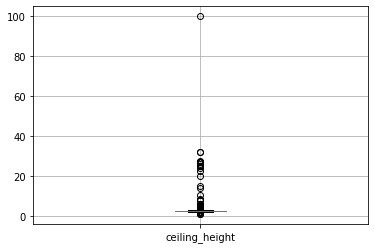

In [24]:
# чтобы изучить особенность поближе, построим коробчатую диаграмму

data.boxplot(column=['ceiling_height'])

# посмотрим количество квартир с высотой потолков меньше 2х метров

print(data.query('ceiling_height < 2')['ceiling_height'].count())

# посмотрим количество квартир с потолками более 5 метров и менее 25 метров

print(data.query('25 > ceiling_height > 5')['ceiling_height'].count())

# посмотрим количество квартир с потолками 25 метров и более, но менее 50

print(data.query('50 >= ceiling_height >= 25')['ceiling_height'].count())

# посмотрим количество квартир с потолками более 50 метров

print(data.query('ceiling_height > 50')['ceiling_height'].count())


- квартиры с высотой потолков менее 2х метров = удаляем
- квартиры с высотой потолков более 5 метров и менее 25 - удаляем
- в квартирах с высотой потолков 25 квадратов и более предоположим, что должны быть вещественные значения и исправим опечатку
- квартиру с высотой потолка более 50 метров - удалим

In [25]:
# удалим выбросы с высотой потолков меньше 2х метров

data.loc[data['ceiling_height'] < 2, 'ceiling_height'] = np.nan 
print(data.query('ceiling_height < 2')['ceiling_height'].count())

# удалим выбросы с потолками более 5 метров и менее 25 метров

data.loc[(data['ceiling_height'] > 5) & (data['ceiling_height'] < 25), 'ceiling_height'] = np.nan 
print(data.query('25 > ceiling_height > 5')['ceiling_height'].count())

# исправим опечатку 

data.update(data[(data['ceiling_height'] >= 25) & (data['ceiling_height'] <= 50)]['ceiling_height']/10)
print(data.query('50 >= ceiling_height >= 25')['ceiling_height'].count())


# удалим квартиру с потолком более 50 метров

data.loc[data['ceiling_height'] > 50, 'ceiling_height'] = np.nan 
print(data.query('ceiling_height > 50')['ceiling_height'].count())



0
0
0
0


25
7


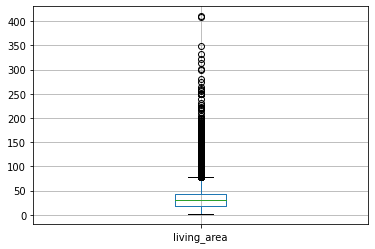

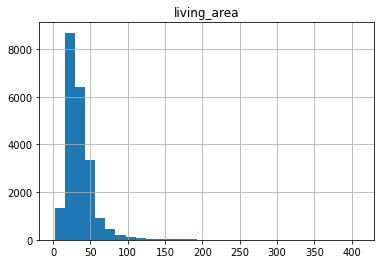

In [26]:
# чтобы изучить особенность поближе, построим коробчатую диаграмму

data.boxplot(column=['living_area'])
data.hist('living_area', bins=30)

# посмотрим количество квартир c площадью менее 10 кв.м.

print(data.query('living_area < 10')['living_area'].count())

# посмотрим количество квартир c площадью более 300 кв.м.

print(data.query('living_area > 300')['living_area'].count())



- удалим квартиры с площадью менее 10 кв.м., т.к. такая площадь маловероятна
- отбросим квартиры с площадью более 300 кв.м.

In [27]:
data.loc[data['living_area'] < 10, 'living_area'] = np.nan 
print(data.query('living_area < 10')['living_area'].count())

data.loc[data['living_area'] > 300, 'living_area'] = np.nan 
print(data.query('living_area > 300')['living_area'].count())


0
0


61
0


<AxesSubplot:xlabel='rooms'>

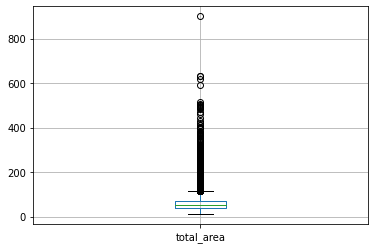

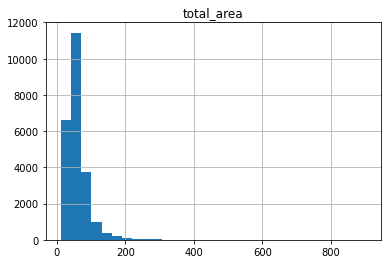

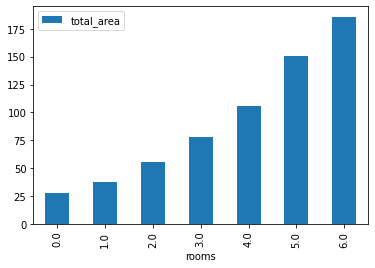

In [28]:
# чтобы изучить особенность поближе, построим коробчатую диаграмму

data.boxplot(column=['total_area'])
data.hist('total_area', bins=30)

# посмотрим количество квартир c общей площадью более 300 кв.м.

print(data.query('total_area > 300')['total_area'].count())

# удалим выбросы в столбце 'total_area'

data.loc[data['total_area'] > 300, 'total_area'] = np.nan 
print(data.query('total_area > 300')['total_area'].count())


# посмотрим отношение количества комнат к общей площади

data.pivot_table(index='rooms', values='total_area').plot(y='total_area', kind='bar')

Выбросы - квартиры с площадью более 300 кв.м. (элитная недвижимость), удалим их, чтобы они не влияли на наше среднее значение. 

In [29]:
# сбросим индексы

data.reset_index(drop=True,inplace=True)


In [30]:
data.shape[0] / old_data.shape[0]

0.994345752985358

### Посчитайте и добавьте в таблицу новые столбцы.

**3.1 Добавим столбец со стоимостью кв.м.**

In [31]:
data['price_square_meter'] = data['last_price'] / data['total_area']
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter
0,20,13000000.0,108.0,2019-03-07,3.0,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370
1,7,3350000.0,40.4,2018-12-04,1.0,2.75,11,18.6,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079
2,10,5196000.0,56.0,2015-08-20,2.0,2.55,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286
3,0,64900000.0,159.0,2015-07-24,3.0,2.60,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629
4,2,10000000.0,100.0,2018-06-19,2.0,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000


**3.2 Добавим столбцы - день недели, месяц и год публикации объявления.**

In [32]:
# день публикации объявления, где 0-понедельник, 1-вторник и т.д.

data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year
data.head()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday,month,year
0,20,13000000.0,108.0,2019-03-07,3.0,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1.0,2.75,11,18.6,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2.0,2.55,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3.0,2.60,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2.0,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018


**3.3 Добавим столбец - тип этажа квартиры. Значения - "первый", "последний", "другой".**

In [33]:
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
        
data['floor_type'] = data.apply(floor_type, axis=1)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday,month,year,floor_type
0,20,13000000.0,108.0,2019-03-07,3.0,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1.0,2.75,11,18.6,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2.0,2.55,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3.0,2.60,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2.0,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой


**3.4 Добавим столбец - расстояние от центра города в километрах.**

In [34]:
# переведем расстояние из м в км и округлим

data['city_centers_nearest_km'] = (data['city_centers_nearest'] / 1000).round()
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday,month,year,floor_type,city_centers_nearest_km
0,20,13000000.0,108.0,2019-03-07,3.0,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1.0,2.75,11,18.6,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2.0,2.55,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3.0,2.60,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2.0,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой,8.0


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Все необходимые колонки добавлены. Идём дальше)
</div>

### Проведите исследовательский анализ данных

**4.1 Изучим параметры объектов:** 
-	общая площадь;
-	жилая площадь;
-	площадь кухни;
-	цена объекта;
-	количество комнат;
-	высота потолков;
-	этаж квартиры;
-	тип этажа квартиры («первый», «последний», «другой»);
-	общее количество этажей в доме;
-	расстояние до центра города в метрах;
-	расстояние до ближайшего аэропорта;
-	расстояние до ближайшего парка;
-	день и месяц публикации объявления.


count    23504.000000
mean        59.420008
std         30.512001
min         12.000000
25%         40.000000
50%         52.000000
75%         69.300000
max        300.000000
Name: total_area, dtype: float64

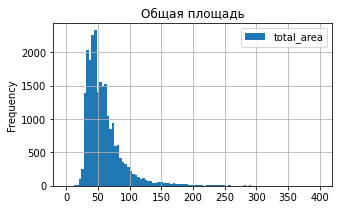

In [35]:
# построим гистограмму для общей площади

data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,400), title='Общая площадь')
data['total_area'].describe()

Распределение нормальное, есть выбросы, но они не сильно влияют на данные. Большинство квартир с площадью менее 100 кв.м

count    21668.000000
mean        34.384910
std         21.297616
min         10.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        300.000000
Name: living_area, dtype: float64

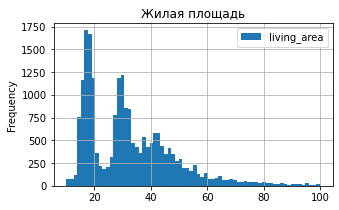

In [36]:
# построим гистограмму для жилой площади

data.plot(y = 'living_area', kind = 'hist', bins = 70, grid=True, figsize = (5,3), range = (10,100), title='Жилая площадь')
data['living_area'].describe()

Здесь 2 пика и провал на в районе 23 кв.м., возможно из-за разного количества комнат в квартирах.

count    21343.000000
mean        10.560994
std          5.900630
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

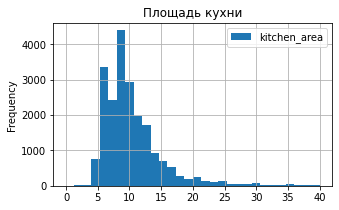

In [37]:
# построим гистограмму для площади кухни

data.plot(y = 'kitchen_area', kind = 'hist', bins = 30, grid=True, figsize = (5,3), range = (0,40), title='Площадь кухни')
data['kitchen_area'].describe()

Здесь распределение нормальное, больше всего кухонь с площадью 5-15 кв.м

count    23556.000000
mean         6.405924
std          7.910168
min          0.012190
25%          3.400000
50%          4.638000
75%          6.776250
max        190.870000
Name: last_price, dtype: float64

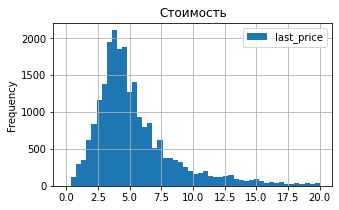

In [38]:
# построим гистограмму для цены объекта

data['last_price'] /= 1000000
data.plot(y = 'last_price', kind = 'hist', bins = 50, grid=True, figsize = (5,3), range = (0,20), title='Стоимость')
data['last_price'].describe()

Распределение нормальное, есть выбросы(элитная недвижимость), но они не сильно влияют на данные.

count    23475.000000
mean         2.047796
std          1.006547
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

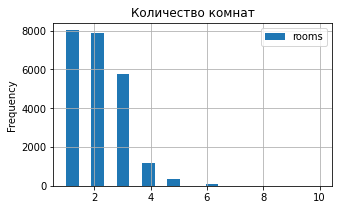

In [39]:
# построим гистограмму для количества комнат

data.plot(y = 'rooms', kind = 'hist', bins = 20, grid=True, figsize = (5,3), range = (1,10), title='Количество комнат')
data['rooms'].describe()

Больше всего квартир с одной, двумя или тремя комнатами, что соответствует действительности.

count    23544.000000
mean         2.706819
std          0.229975
min          2.000000
25%          2.550000
50%          2.650000
75%          2.750000
max          5.000000
Name: ceiling_height, dtype: float64

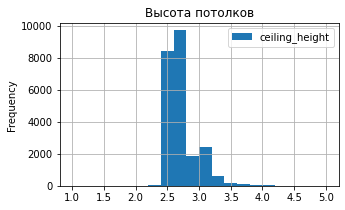

In [40]:
# построим гистограмму для высоты потолков

data.plot(y = 'ceiling_height', kind = 'hist', bins = 20, grid=True, figsize = (5,3), range = (1,5), title='Высота потолков')
data['ceiling_height'].describe()

Больше всего потолков с высотой 2.3 - 3.5 метра, что соответствует строительным нормам

count    23565.000000
mean         5.878124
std          4.871485
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

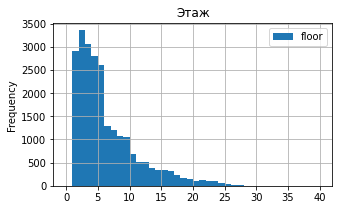

In [41]:
# построим гистограмму для этажа квартиры

data.plot(y = 'floor', kind = 'hist', bins = 40, grid=True, figsize = (5,3), range = (0,40), title='Этаж')
data['floor'].describe()

Больше всего квартир на 1-7 этажах, самый высокий этаж - 33. Здесь всё нормально.

count      23565
unique         3
top       другой
freq       17326
Name: floor_type, dtype: object

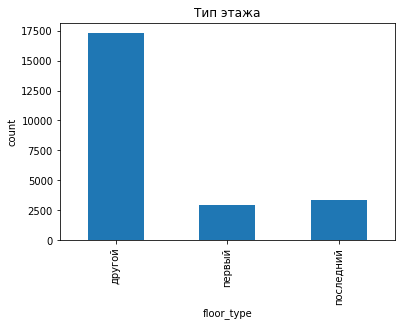

In [42]:
# построим столбчатый график для типа этажа

data.groupby(by='floor_type')['floor_type'].count().plot(kind='bar', ylabel = 'count', title='Тип этажа')
data['floor_type'].describe()

Первых и последних этажей примерно одинаковое количество. Больше всего "других" этажей. Здесь всё нормально.

count    23565.000000
mean        10.675875
std          6.594823
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

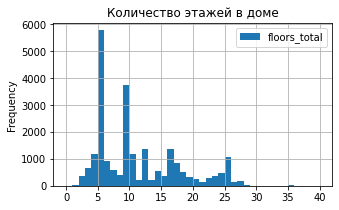

In [43]:
# построим гистограмму для общего количества этажей

data.plot(y = 'floors_total', kind = 'hist', bins = 40, grid=True, figsize = (5,3), range = (0,40), title='Количество этажей в доме')
data['floors_total'].describe()

Больше всего 5 и 9 этажных домов. Также есть пики у высоток. Здесь тоже всё нормально.

count    18064.000000
mean     14192.656056
std       8613.348153
min        181.000000
25%       9238.000000
50%      13096.500000
75%      16285.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

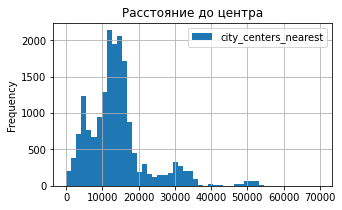

In [44]:
# построим гистограмму для расстояния до центра в метрах

data.plot(y = 'city_centers_nearest', kind = 'hist', bins = 50, grid=True, figsize = (5,3), range = (0,70000), title='Расстояние до центра')
data['city_centers_nearest'].describe()

Здесь два пика, один в районе 5 км, а второй в районе 10-18 км.  Больше всего квартир на расстоянии 12-14 км. от центра.

count    18041.000000
mean     28797.082701
std      12632.499735
min          0.000000
25%      18565.000000
50%      26757.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

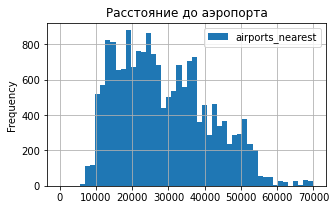

In [45]:
# построим гистограмму для расстояния до ближайшего аэропорта

data.plot(y = 'airports_nearest', kind = 'hist', bins = 50, grid=True, figsize = (5,3), range = (0,70000), title='Расстояние до аэропорта')
data['airports_nearest'].describe()

Много пиков, большой разброс, что является нормой. В основном квартиры расположены не дальше 55 км от аэропорта.

count    8030.000000
mean      490.580448
std       341.572956
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

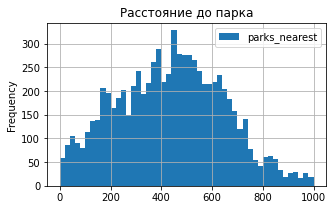

In [46]:
# построим гистограмму для расстояния до ближайшего парка

data.plot(y = 'parks_nearest', kind = 'hist', bins = 50, grid=True, figsize = (5,3), range = (0,1000), title='Расстояние до парка')
data['parks_nearest'].describe()

Больше всего парков находится на расстоянии от 300 до 600 метров

count    23565.000000
mean         2.567367
std          1.788279
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday, dtype: float64


count    23565.000000
mean         6.401570
std          3.492948
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64

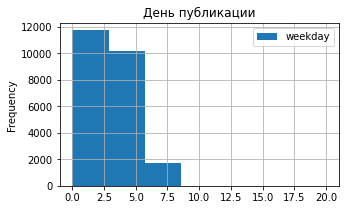

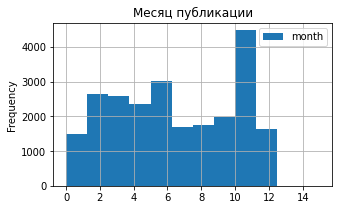

In [47]:
# построим гистограмму для дня и месяца публикации объявления

data.plot(y = 'weekday', kind = 'hist', bins = 7, grid=True, figsize = (5,3), range = (0,20), title='День публикации')
data.plot(y = 'month', kind = 'hist', bins = 12, grid=True, figsize = (5,3), range = (0,15), title='Месяц публикации')
print(data['weekday'].describe())
data['month'].describe()

- Наибольшее количество объявлений в начале недели и уменьшается ближе к выходным. В выходные совсем мало новых публикаций.
- Наибольшее количество объявлений в октябре-ноябре. Наименьшее - январь, летние месяцы и конец года.
 
 Мне кажется, что продажи всегда затихают к концу года, после праздников и летом, в период отпусков. Осень самое продуктивное время для продаж.

**4.2 Изучим как быстро продавались квартиры.**

<AxesSubplot:ylabel='Frequency'>

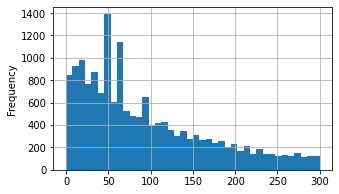

In [48]:
# построим гистограмму для 'days_exposition' отбросив (пропущенные) значения, которые мы отметили нулём

data.query('days_exposition != 0')['days_exposition'].plot(y = 'days_exposition', kind = 'hist', bins = 40, grid=True, figsize = (5,3), range = (0,300))


In [49]:
# посчитаем среднее и медиану

print('Среднее время продажи:', data.query('days_exposition != 0')['days_exposition'].mean().astype(int))
print('Медианное время продажи:', data.query('days_exposition != 0')['days_exposition'].median().astype(int))

Среднее время продажи: 180
Медианное время продажи: 95


Среднее время продажи квартир в 2 раза больше медианного, т.к. на гистограмме видно очень длинный хвост из квартир с долгой продажей. Распределение данных равномерное, но редкие выбросы присутствуют. 

Быстрыми можно считать продажи завершенные до 45 дней, а необычно долгие - продаются более 500 дней.

В среднем продажа занимает - 90-95 дней, но возможно истекает срок объявления и оно автоматически снимается с публикации спустя 3 месяца от размещения на сайт.

**4.3 Проверим какие факторы больше всего влияют на общую (полную) стоимость объекта.**

Изучим, зависит ли цена от:
-	общей площади;
-	жилой площади;
-	площади кухни;
-	количества комнат;
-	этажа, на котором расположена квартира (первый, последний, другой);
-	даты размещения (день недели, месяц, год).


Коэффициент Пирсона = 0.71770220208456


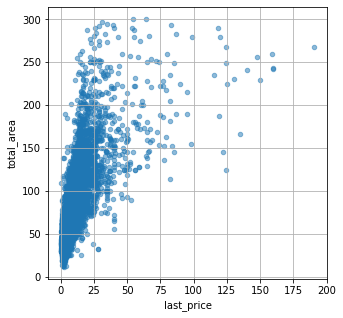

In [50]:
# график зависимости цены от общей площади

data.plot(x='last_price', y='total_area', kind='scatter', grid=True, alpha=0.5, figsize=(5, 5))
print('Коэффициент Пирсона =', data['total_area'].corr(data['last_price']))


Коэффициент Пирсона - положительный, чем больше общая площадь, тем больше стоимость квартиры.

Коэффициент Пирсона = 0.6516496997827262


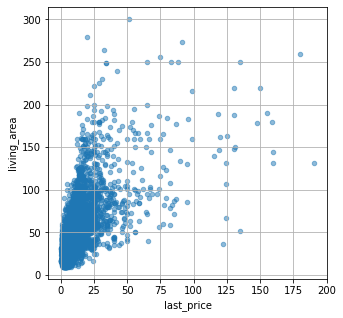

In [51]:
# график зависимости цены от жилой площади

data.plot(x='last_price', y='living_area', kind='scatter', grid=True, alpha=0.5, figsize=(5, 5))
print('Коэффициент Пирсона =', data['living_area'].corr(data['last_price']))

Коэффициент Пирсона - положительный, чем больше жилая площадь, тем больше стоимость квартиры. Но зависимость меньше, чем у общей площади.

Коэффициент Пирсона = 0.5639521768822148


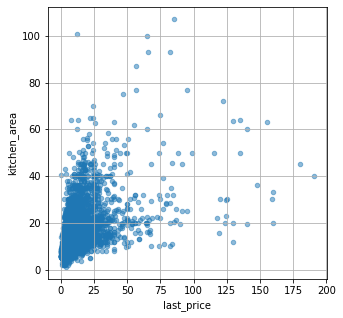

In [52]:
# график зависимости цены от кухонной площади

data.plot(x='last_price', y='kitchen_area', kind='scatter', grid=True, alpha=0.5, figsize=(5, 5))
print('Коэффициент Пирсона =', data['kitchen_area'].corr(data['last_price']))

Коэффициент Пирсона - положительный, чем больше кухонная площадь, тем больше стоимость квартиры. Но зависимость меньше, чем у жилой площади.

Коэффициент Пирсона = 0.4084688066590681


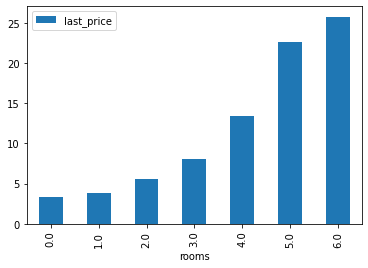

In [53]:
# график зависимости цены от количества комнат

data.pivot_table(index='rooms', values='last_price').plot(y='last_price', kind='bar');
print('Коэффициент Пирсона =', data['rooms'].corr(data['last_price']))

Коэффициент Пирсона - положительный, чем больше комнат, тем больше стоимость квартиры. Но зависимость равномерно возрастает до 8комнатных квартир. У 10-19 комнатных квартир (не считая 15) - зависимость примерно равна.

Коэффициент Пирсона = 0.02402309085881046


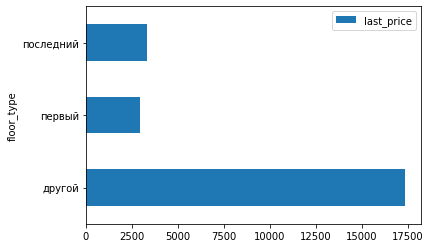

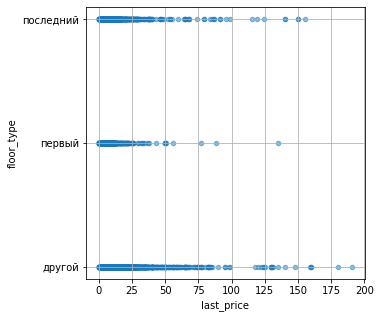

In [54]:
# график зависимости цены от типа этажа

data.pivot_table(index='floor_type', values='last_price', aggfunc='count').plot(y='last_price', kind='barh');
data.plot(x='last_price', y='floor_type', kind='scatter', grid=True, alpha=0.5, figsize=(5, 5))
print('Коэффициент Пирсона =', data['floor'].corr(data['last_price']))

Видно, что на первом этаже самые дешевые квартиры, а на "других" этажах - самые дорогие.

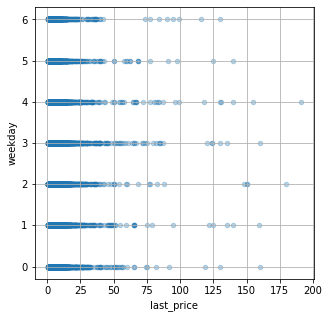

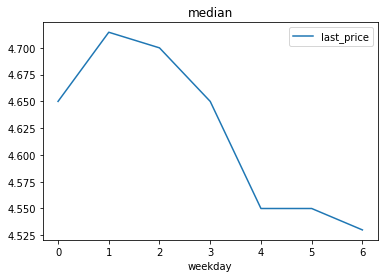

In [55]:
# график зависимости цены от даты размещения (день недели)

data.plot(x='last_price', y='weekday', kind='scatter', grid=True, alpha=0.3, figsize=(5, 5))
data.pivot_table(index='weekday', values='last_price', aggfunc='median').plot(y='last_price', kind='line', title='median');



К середине недели стоимость выше, возможно это связано с тем, что к этому времени добавляется больше объявлений. 

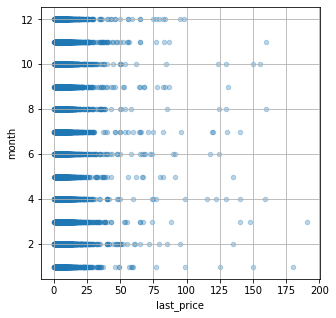

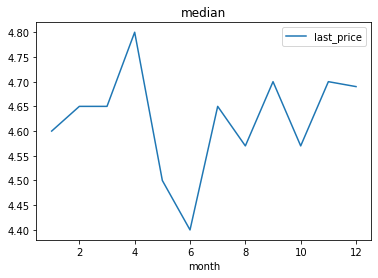

In [56]:
# график зависимости цены от даты размещения (месяц)

data.plot(x='last_price', y='month', kind='scatter', grid=True, alpha=0.3, figsize=(5, 5))
data.pivot_table(index='month', values='last_price', aggfunc='median').plot(y='last_price', kind='line', title='median');


Летом цены ниже, осенью выше. Это может быть также связано с тем, что летом добавляют значительно меньше объявлений, чем осенью.

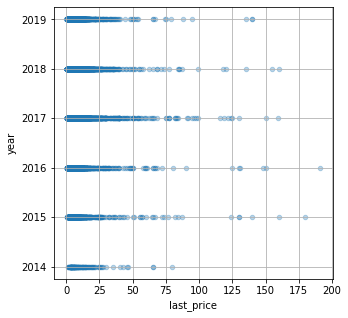

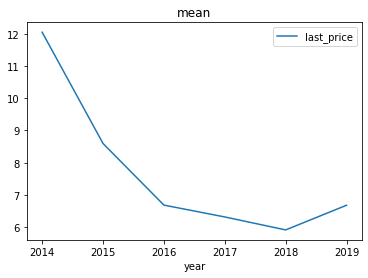

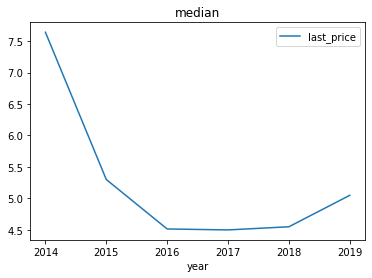

In [57]:
# график зависимости цены от даты размещения (год)

data.plot(x='last_price', y='year', kind='scatter', grid=True, alpha=0.3, figsize=(5, 5))
data.pivot_table(index='year', values='last_price', aggfunc='mean').plot(y='last_price', kind='line', title='mean');
data.pivot_table(index='year', values='last_price', aggfunc='median').plot(y='last_price', kind='line', title='median');

К 2016 году недвижимость сильно упала в цене, а после 2018 года снова начался рост цен. 

**4.4 Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.**

                   count    mean
locality_name                   
Санкт-Петербург    15591  114156
Пушкин               367  103130
деревня Кудрово      299   92473
поселок Парголово    327   90175
поселок Мурино       552   85629
поселок Шушары       439   78551
Колпино              337   75333
Гатчина              307   68746
Всеволожск           398   68654
Выборг               237   58141


<AxesSubplot:ylabel='locality_name'>

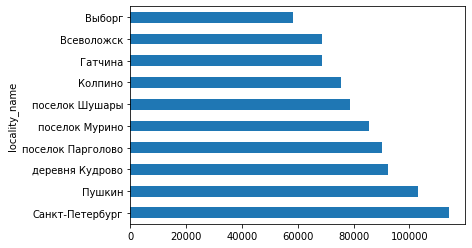

In [58]:
# определим среднюю цену за кв.м. в 10 населенных пунктах с наибольшим количеством объявлений

city_data_pivot = data.pivot_table(index='locality_name', values='price_square_meter', aggfunc=['count', 'mean']).astype(int)
city_data_pivot.columns = ['count', 'mean']

# отсортируем полученную таблицу по количеству объявлений 

city_data_pivot_sorted = city_data_pivot.sort_values(by='count', ascending=False).head(10)

# отсортируем полученную таблицу по цене за кв.метр

city_data_pivot_sorted = city_data_pivot_sorted.sort_values(by='mean', ascending=False)
print(city_data_pivot_sorted)
city_data_pivot_sorted['mean'].plot(kind='barh')

Из 10 населенных пунктов с наибольшим количеством объявлений:
- самая высокая цена за кв.м. - в г. Санкт-Петербург = 114356
- самая низкая цена за кв.м. - в г. Выборг = 58141


**4.5 Вычислим среднюю цену каждого километра для г. Санкт-Петербург.**

<AxesSubplot:xlabel='city_centers_nearest_km'>

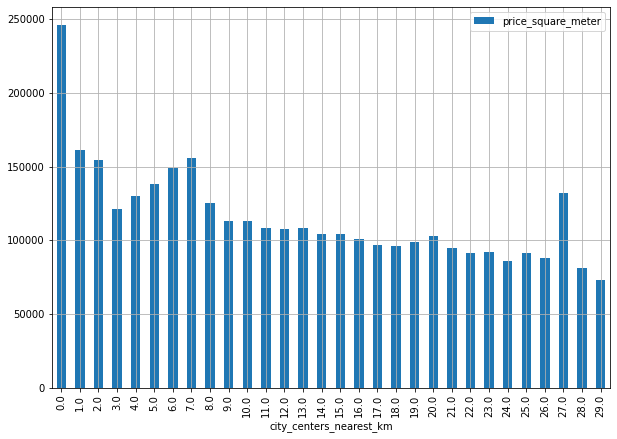

In [59]:
(data.query('locality_name == \"Санкт-Петербург\"')
 .pivot_table(index='city_centers_nearest_km', values='price_square_meter', aggfunc='mean')
 .plot(kind = 'bar', grid=True, figsize=(10, 7))
)

Самая дорогая недвижимость - в центре города. Чем дальше от центра, тем стоимость ниже. Но на расстоянии 3 км. - стоимость резко снижается, а на расстоянии 27 км. - резко возрастает. Возможно там расположены какие-то объекты (парковая зона с видом на собор) или факторы (шумная дорога), которые влияют на стоимость.

### Общий вывод

**Изучена общая информация по таблице:**
- всего в таблице 22 столбца и 23699 записи
- больше половины столбцов имеют пропущенные значения
- некоторые столбцы имеют некорректный тип данных (например, тип данных в 'first_day_exposition' - должен быть datetime, а в 'is_apartment' - bool)
- явные дубликаты не выявлены
- написание названия столбца 'cityCenters_nearest' - дурной тон
- есть аномальные значения, например, высота потолков, где минимум - 1 метр, а максимум - 100 метров или общая площадь, где минимум 12 кв.м., а максимум - 900 кв.м.

**Была произведена предобработка данных:**
- заполнены или удалены пропущенные значения там, где это возможно
- изменены типы данных для удобной работы
- изучены и обработаны уникальные значения 
- устранены выбросы

__Посчитаны и добавлены новые столбцы:__
-	цена одного квадратного метра;
-	день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
-	месяц публикации объявления;
-	год публикации объявления;
-	тип этажа квартиры (значения — «первый», «последний», «другой»);
-	расстояние до центра города в километрах.

__Проведён исследовательский анализ данных:__

**Изучены следующие параметры объектов:**
-	**_общая площадь_** - большинство квартир с площадью менее 100 кв.м. Гистограмма с нормальным распределением;
-	**_жилая площадь_** - на гистограмме 2 пика и провал на в районе 23 кв.м., возможно из-за разного количества комнат в квартирах;
-	**_площадь кухни_** - больше всего кухонь с площадью 5-15 кв.м. Гистограмма с нормальным распределением;
-	**_цена объекта_** - распределение по гистограмме нормальное, есть выбросы(элитная недвижимость);
-	**_количество комнат_** - больше всего квартир с одной, двумя или тремя комнатами;
-	**_высота потолков_** - больше всего потолков с высотой 2.3 - 3.5 метра, что соответствует строительным нормам;
-	**_этаж квартиры_** - больше всего квартир на 1-7 этажах, самый высокий этаж - 33;
-	**_тип этажа квартиры («первый», «последний», «другой»)_** - первых и последних этажей примерно одинаковое количество. Больше всего "других" этажей;
-	**_общее количество этажей в доме_** - больше всего 5 и 9 этажных домов. Также на гистограмме есть пики у высоток;
-	**_расстояние до центра города в метрах_** - на гистограмме два пика, один в районе 5 км, а второй в районе 10-18 км.  Больше всего квартир на расстоянии 12-14 км. от центра;
-	**_расстояние до ближайшего аэропорта_** - много пиков на гистограмме, большой разброс, что является нормой;
-	**_расстояние до ближайшего парка_** - больше всего парков находится на расстоянии от 300 до 600 метров;
-	**_день и месяц публикации объявления_** - наибольшее количество объявлений в начале недели и уменьшается ближе к выходным. В выходные совсем мало новых публикаций. Наибольшее количество объявлений в октябре-ноябре. Наименьшее - январь, летние месяцы и конец года.

**Изучено как быстро продавались квартиры:**
- Среднее время продажи квартир в 2 раза больше медианного, т.к. на гистограмме видно очень длинный хвост из квартир с долгой продажей. Распределение данных равномерное, но редкие выбросы присутствуют. 

- Быстрыми можно считать продажи завершенные до 45 дней, а необычно долгие - продаются более 500 дней.

- В среднем продажа занимает - 90-95 дней, но возможно истекает срок объявления и оно автоматически снимается с публикации спустя 3 месяца от размещения на сайт.

**Изучено, зависит ли цена от:**
-	**_общей площади_** - чем больше общая площадь, тем больше стоимость квартиры;
-	**_жилой площади_** - чем больше жилая площадь, тем больше стоимость квартиры;
-	**_площади кухни_** - чем больше кухонная площадь, тем больше стоимость квартиры;
-	**_количества комнат_** - чем больше комнат, тем больше стоимость квартиры. Но зависимость равномерно возрастает до 8комнатных квартир. У 10-19 комнатных квартир (не считая 15) - зависимость примерно равна;
-	**_этажа, на котором расположена квартира (первый, последний, другой)_** - на первом этаже самые дешевые квартиры, а на “других” этажах - самые дорогие;
-	**_даты размещения (день недели, месяц, год)_** - к середине недели стоимость выше, возможно это связано с тем, что к этому времени добавляется больше объявлений.
Летом цены ниже, осенью выше. Это может быть также связано с тем, что летом добавляют значительно меньше объявлений, чем осенью.
К 2016 году недвижимость сильно упала в цене, а после 2018 года снова начался рост цен.

**Посчитана средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим количеством объявлений:**

                      count	 mean
    locality_name		
    Санкт-Петербург   15642   114356

    Пушкин            369     103125
    
    деревня Кудрово   299     92473

    поселок Парголово 327     90175

    поселок Мурино    552     85629

    поселок Шушары    439     78551

    Колпино           338     75424

    Гатчина           307     68746

    Всеволожск        398     68654

    Выборг            237     58141
    
   **_Из 10 населенных пунктов с наибольшим количеством объявлений:_**
- самая высокая цена за кв.м. - в г. Санкт-Петербург = 114356
- самая низкая цена за кв.м. - в г. Выборг = 58141

**Вычислена средняя цену каждого километра для г. Санкт-Петербург:**

Самая дорогая недвижимость - в центре города. Чем дальше от центра, тем стоимость ниже. Но на расстоянии 3 км. - стоимость резко снижается, а на расстоянии 27 км. - резко возрастает. Возможно там расположены какие-то объекты (парковая зона с видом на собор) или факторы (шумная дорога), которые влияют на стоимость.


**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод